# Correlaciones

In [1]:
# Load Libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd 


## Dataset

Leamos el dataset a utilizar. 

In [2]:
# Load the dataset 
dat = pd.read_csv("../../datasets/iris.csv", sep='|', decimal=',')
dat

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Correlaciones

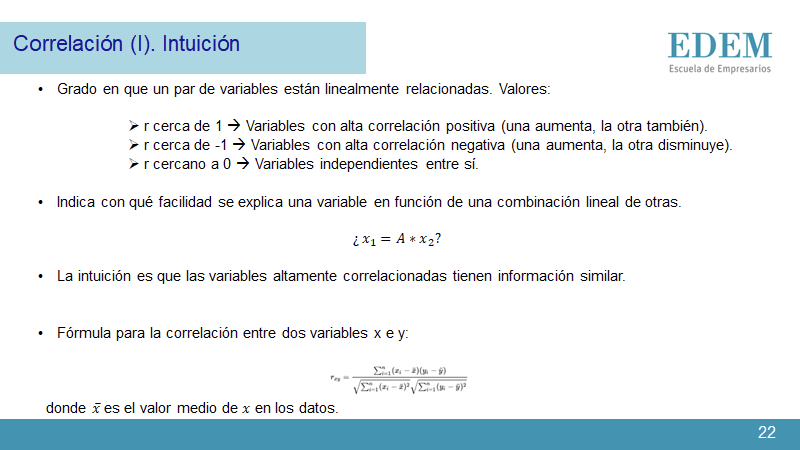

### Visualización

Algunas correlaciones pueden observarse mediante visualizaciones de una variable con respecto a la otra. Por ejemplo, podemos realizar un scatter plot que muestre *Sepal_Width* con respecto a *Sepal_Length*.

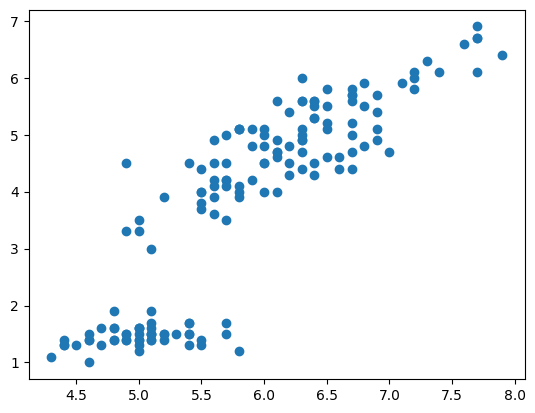

In [3]:
plt.scatter(x = dat.Sepal_Length, y = dat.Petal_Length)
plt.show()

La correlación parece evidente a simple vista.

Podemos hacer esto mismo para todas las variables numéricas del dataset.

array([[<Axes: xlabel='Sepal_Length', ylabel='Sepal_Length'>,
        <Axes: xlabel='Sepal_Width', ylabel='Sepal_Length'>,
        <Axes: xlabel='Petal_Length', ylabel='Sepal_Length'>,
        <Axes: xlabel='Petal_Width', ylabel='Sepal_Length'>],
       [<Axes: xlabel='Sepal_Length', ylabel='Sepal_Width'>,
        <Axes: xlabel='Sepal_Width', ylabel='Sepal_Width'>,
        <Axes: xlabel='Petal_Length', ylabel='Sepal_Width'>,
        <Axes: xlabel='Petal_Width', ylabel='Sepal_Width'>],
       [<Axes: xlabel='Sepal_Length', ylabel='Petal_Length'>,
        <Axes: xlabel='Sepal_Width', ylabel='Petal_Length'>,
        <Axes: xlabel='Petal_Length', ylabel='Petal_Length'>,
        <Axes: xlabel='Petal_Width', ylabel='Petal_Length'>],
       [<Axes: xlabel='Sepal_Length', ylabel='Petal_Width'>,
        <Axes: xlabel='Sepal_Width', ylabel='Petal_Width'>,
        <Axes: xlabel='Petal_Length', ylabel='Petal_Width'>,
        <Axes: xlabel='Petal_Width', ylabel='Petal_Width'>]], dtype=object)

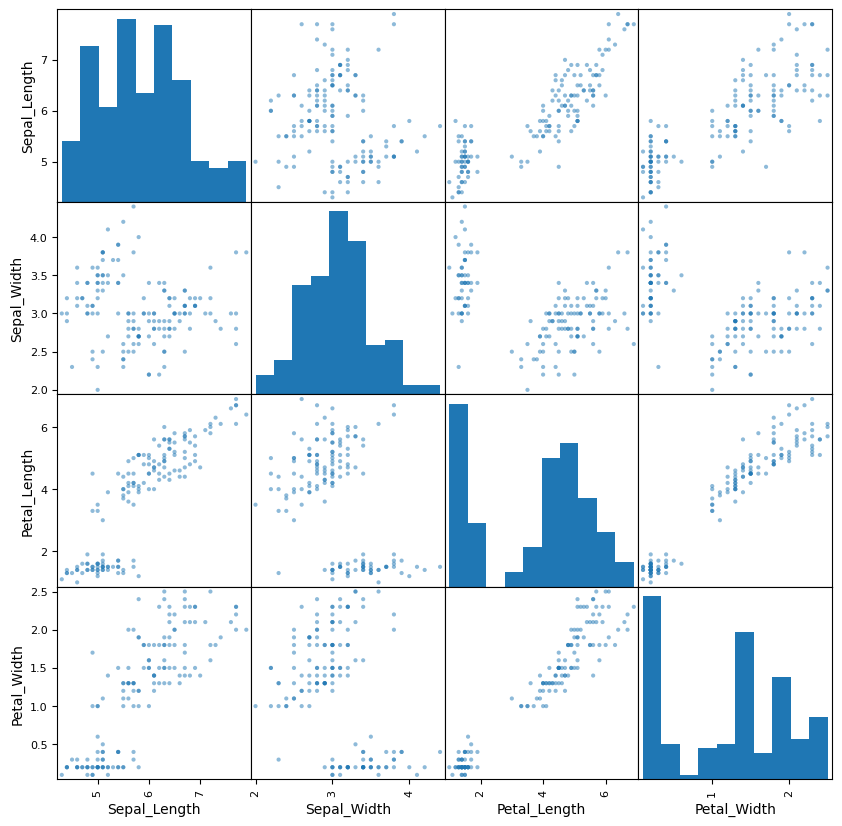

In [4]:
from pandas.plotting import scatter_matrix
scatter_matrix(dat, figsize = (10,10))

## Cálculo numérico

Podemos calcular el valor numérico de esta correlación con la fórmula vista en clase.

In [7]:
np.corrcoef(dat.Sepal_Length, dat.Petal_Length)[0, 1]

0.8717537758865831

## Matriz de correlaciones

Podemos crear la matriz de correlaciones entre todas las variables numéricas del dataset.

In [8]:
corr = dat.corr()
corr

/var/folders/sh/9bbsgk012cqb1v63_49fjyy40000gn/T/ipykernel_28959/3318866176.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dat.corr()


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Sepal_Length,1.000000,-0.117570,0.871754,0.817941
Sepal_Width,-0.117570,1.000000,-0.428440,-0.366126
Petal_Length,0.871754,-0.428440,1.000000,0.962865
Petal_Width,0.817941,-0.366126,0.962865,1.000000


Esta matriz puede ser formateada para ser más informativa.

In [9]:
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/var/folders/sh/9bbsgk012cqb1v63_49fjyy40000gn/T/ipykernel_28959/1928666696.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Sepal_Length,1.00,-0.12,0.87,0.82
Sepal_Width,-0.12,1.00,-0.43,-0.37
Petal_Length,0.87,-0.43,1.00,0.96
Petal_Width,0.82,-0.37,0.96,1.00


También podemos mostrarla sin números.

In [26]:
corr.style.background_gradient(cmap='coolwarm').set_properties(**{'font-size': '0pt'})

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Sepal_Length,1.000000,-0.117570,0.871754,0.817941
Sepal_Width,-0.117570,1.000000,-0.428440,-0.366126
Petal_Length,0.871754,-0.428440,1.000000,0.962865
Petal_Width,0.817941,-0.366126,0.962865,1.000000


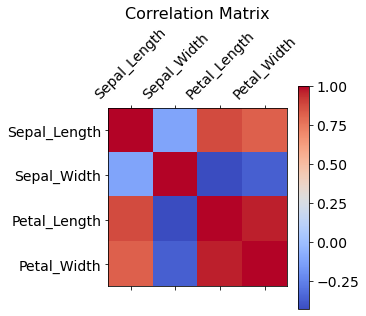

In [36]:
plt.matshow(corr, cmap='coolwarm')
cb = plt.colorbar()
plt.xticks(range(dat.select_dtypes(['number']).shape[1]), dat.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(dat.select_dtypes(['number']).shape[1]), dat.select_dtypes(['number']).columns, fontsize=14)
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
plt.show()